# Project: Movie Data Analysis!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset we selected is from the movie database and contains a LOT of movies and information about those movies, such as the budget, revenue, release date, vote average and more!

In [2]:
# Here we import all the necessary libraries to explore and visualize data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


### Questions

- It would be interesting to analyze the trend over time of the movies industry, analyzing aspects such as revenue generated, amount of movies launched each year, and the vote average of those movies.

- Another interesting thing to see is if there is a relationship between the revenue generated by each movie and the others variables.

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Here we import the data from a CSV file and assign it to the main_df variable, then we use the head function to take a peak on how the data is structured and what is in each column.

In [3]:
main_df = pd.read_csv('tmdb-movies.csv')
main_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


With the shape function we can see the size of the dataset in terms of rows and columns. And from the result we can see that it has 10866 rows and 21 columns

In [3]:
main_df.shape

(10866, 21)

Next we analyze the datatypes of each column with the dtypes functions. This is important because if what it is supposed to be a numeric column is another type, then you won't be able to perform operations on that column. Luckily that is not the case with this dataset.

In [6]:
pd.DataFrame(main_df.dtypes)

,0
id,int64
imdb_id,object
popularity,float64
budget,int64
revenue,int64
original_title,object
cast,object
homepage,object
director,object
tagline,object


For our next step, we will anaylize how it is structured column by column to see if there are any missing values. We can see that some columns have a lot of missing values such us the homepage column, followed by the tagline column. Let's see what those columns have!

In [8]:
main_df.info(), main_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(None, id                         0
 imdb_id                   10
 popularity                 0
 budget                     0
 revenue                    0
 original_title             0
 cast                      76
 homepage                7930
 director                  44
 tagline                 2824
 keywords                1493
 overview                   4
 runtime                    0
 genres                    23
 production_companies    1030
 release_date               0
 vote_count                 0
 vote_average               0
 release_year               0
 budget_adj                 0
 revenue_adj                0
 dtype: int64)

### Data Cleaning

Let's take a look at what is the data in this columns that have NA values

In [4]:
main_df[['homepage','tagline','keywords','genres','production_companies']].head()

,homepage,tagline,keywords,genres,production_companies
0,http://www.jurassicworld.com/,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
1,http://www.madmaxmovie.com/,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...
2,http://www.thedivergentseries.movie/#insurgent,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...
3,http://www.starwars.com/films/star-wars-episod...,Every generation has a story.,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot
4,http://www.furious7.com/,Vengeance Hits Home,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...


It seems that this columns won't help us that much in our analysis at the moment, so we can drop them. We'll also drop the id and imbd_id as the don't add any value to the analysis. We'll also drop budget and revenue, as we already have the budget_adj and revenue_adj, which are adjusted for inflation and will be useful for comparing movies between time.

In [5]:
main_df.drop(columns = ['id', 'imdb_id', 'budget', 'revenue', 'homepage','tagline','keywords','genres','production_companies'], inplace=True)
main_df.head()

,popularity,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### What is the relationship between budget and revenue?

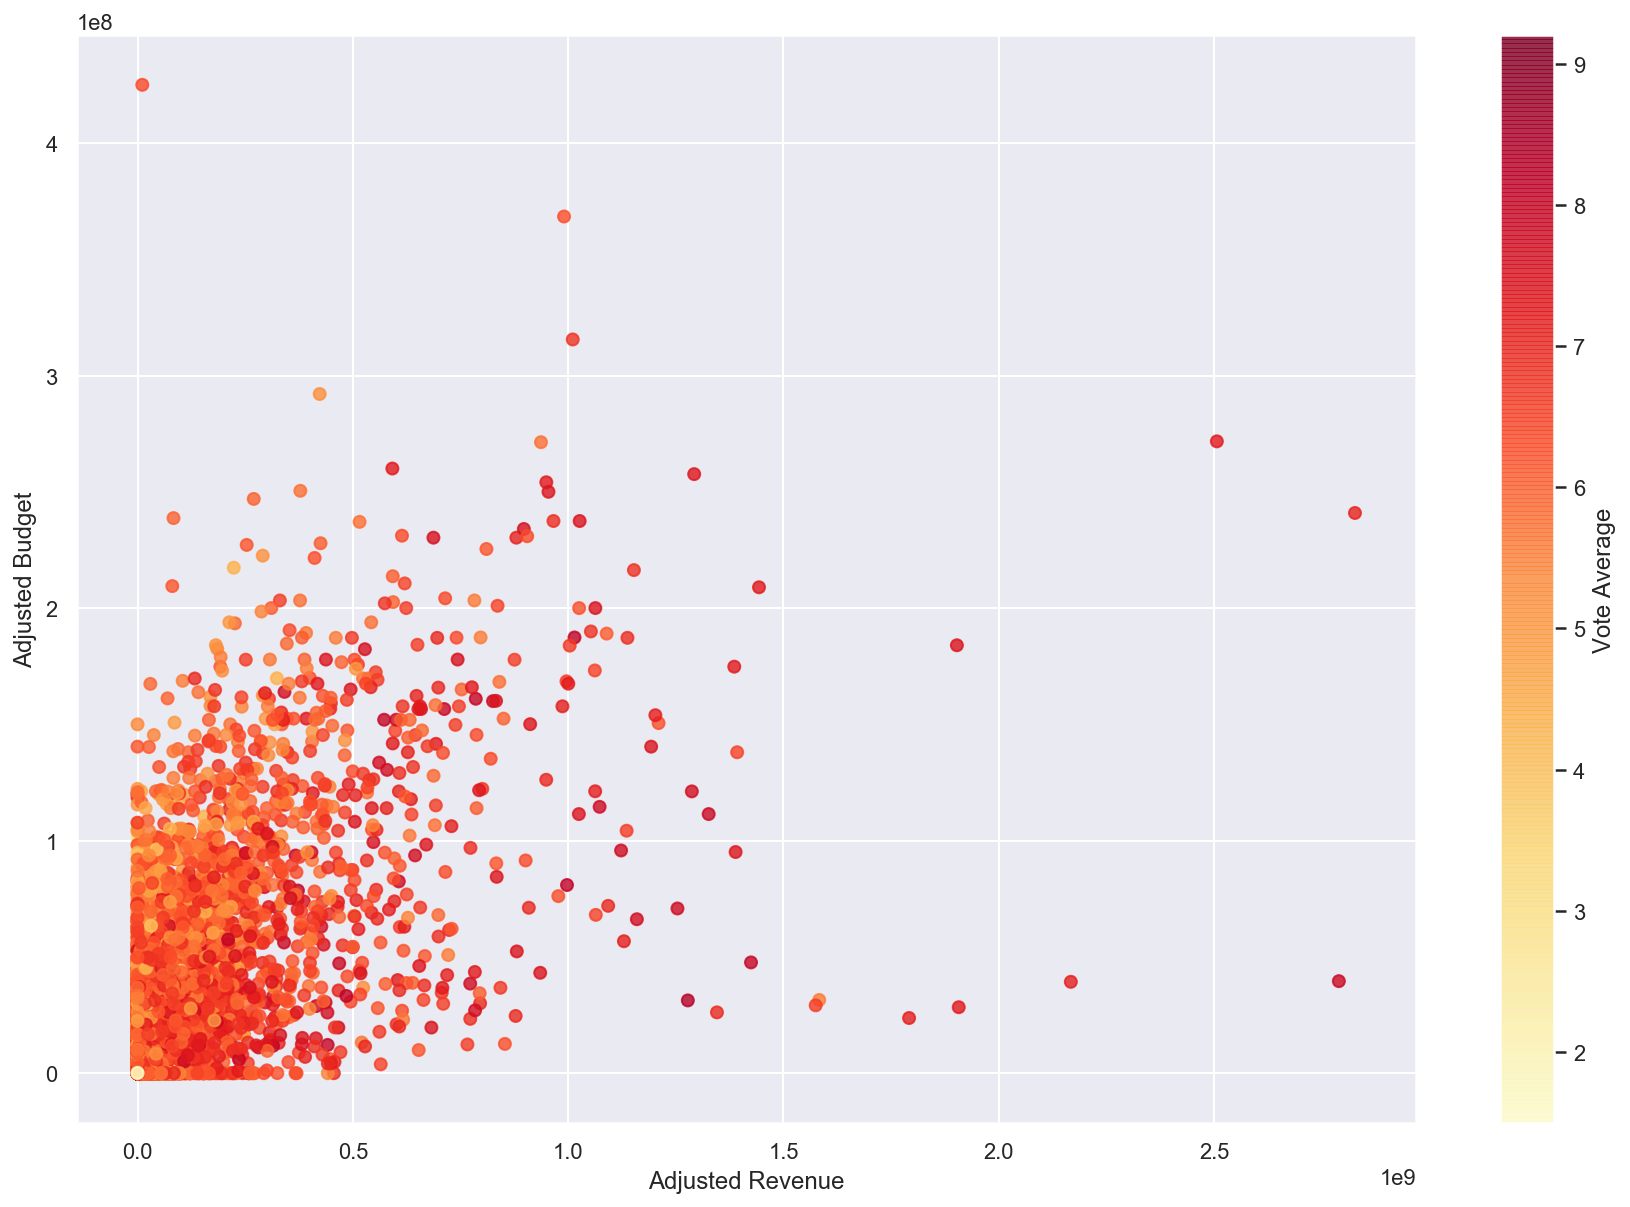

In [6]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
scat = ax.scatter(x=main_df.revenue_adj, y=main_df.budget_adj, alpha=0.8, c=main_df.vote_average, cmap='YlOrRd')
cb = plt.colorbar(scat)
cb.set_label('Vote Average')
plt.xlabel('Adjusted Revenue')
plt.ylabel('Adjusted Budget')
plt.show();

So we can see from the scatter plot that there is a weak positive relationship between budget and revenue, although it is a bit spread out. Which means that it is not a condition that you need a big budget to produce more revenue, some outliers with small budgets produced some of the biggest revenue. I also coloured the points with the Vote Average, to see if there was any influence in the vote score of the film with the revenue. And we can see that some of the largest revenue movies also have a high score, while all the low scored movies have low revenue.

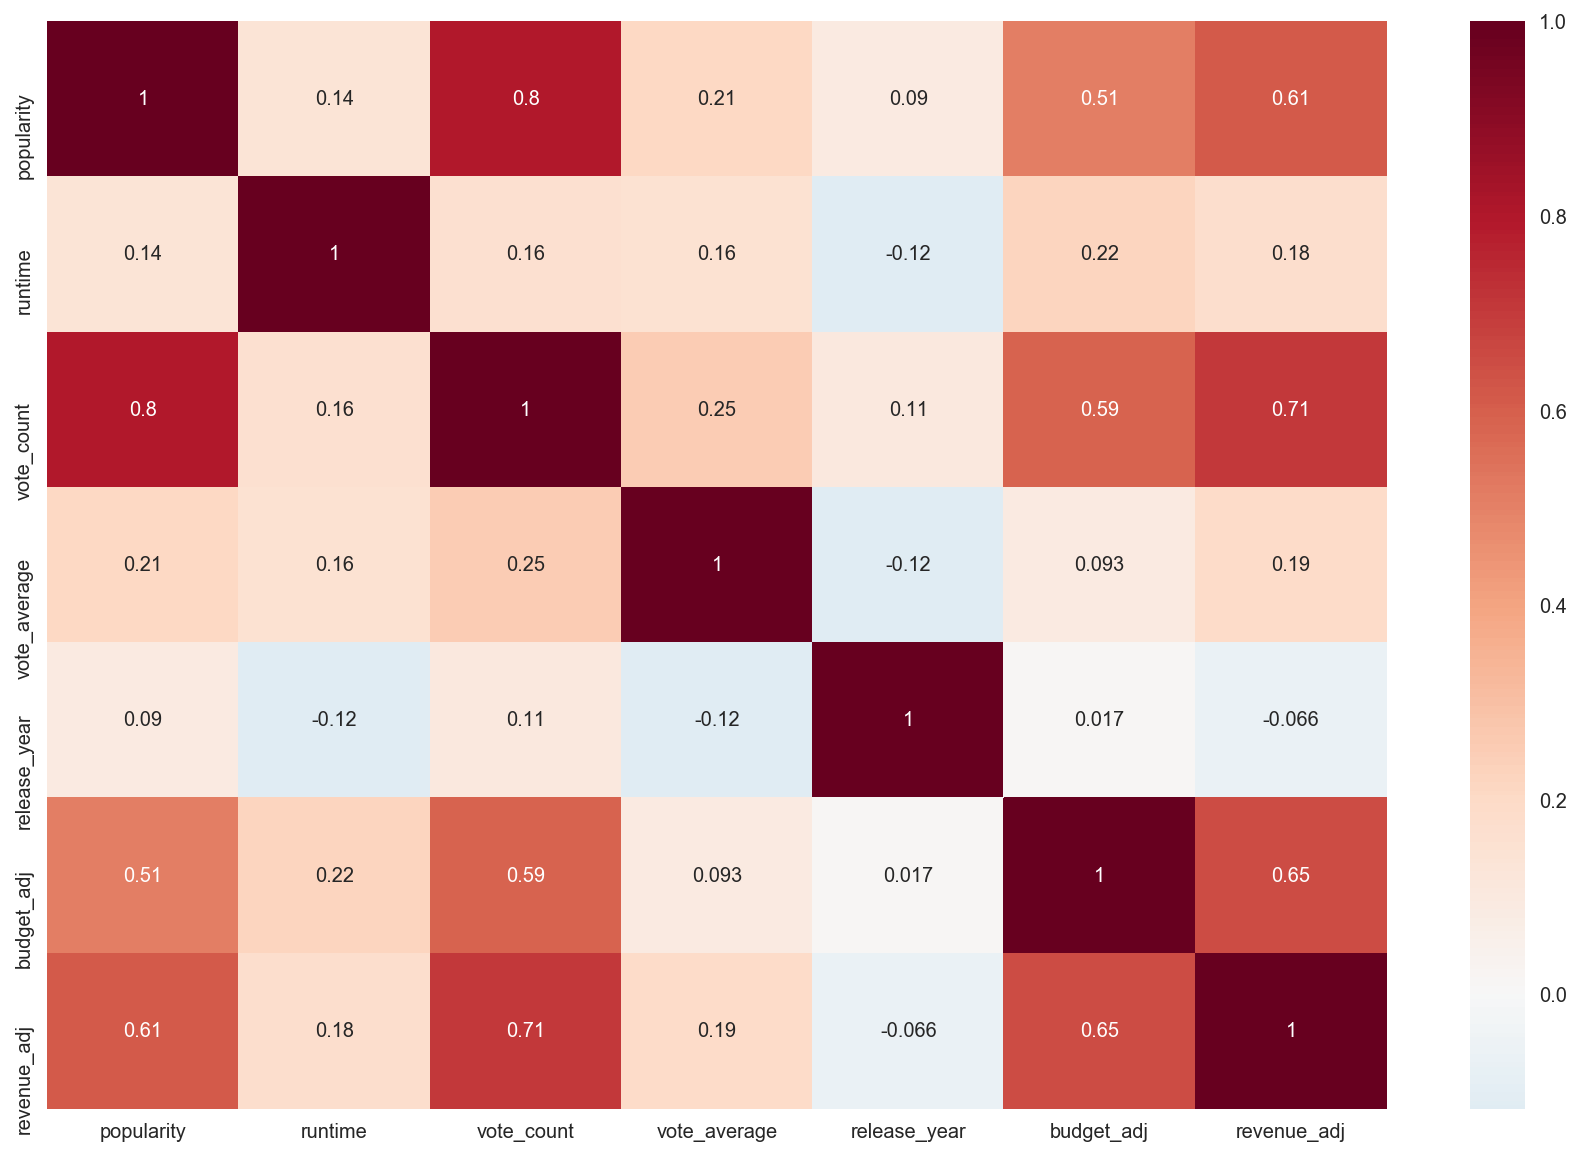

In [27]:
corr = main_df.corr()
plt.subplots(figsize = (15,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, center = 0, annot = True, cmap='RdBu_r' )
plt.show();

The heatmap is a powerful visualization tool to easily observe how quantitative variables correlate with each other. As we are interested in the revenue. We can observe that the variables that are most correlated with revenue are popularity, vote count and budget, which makes sense based on what we observed in the scatterplot. This does not imply causation by any means.

### How has the movie industry evolved over time?

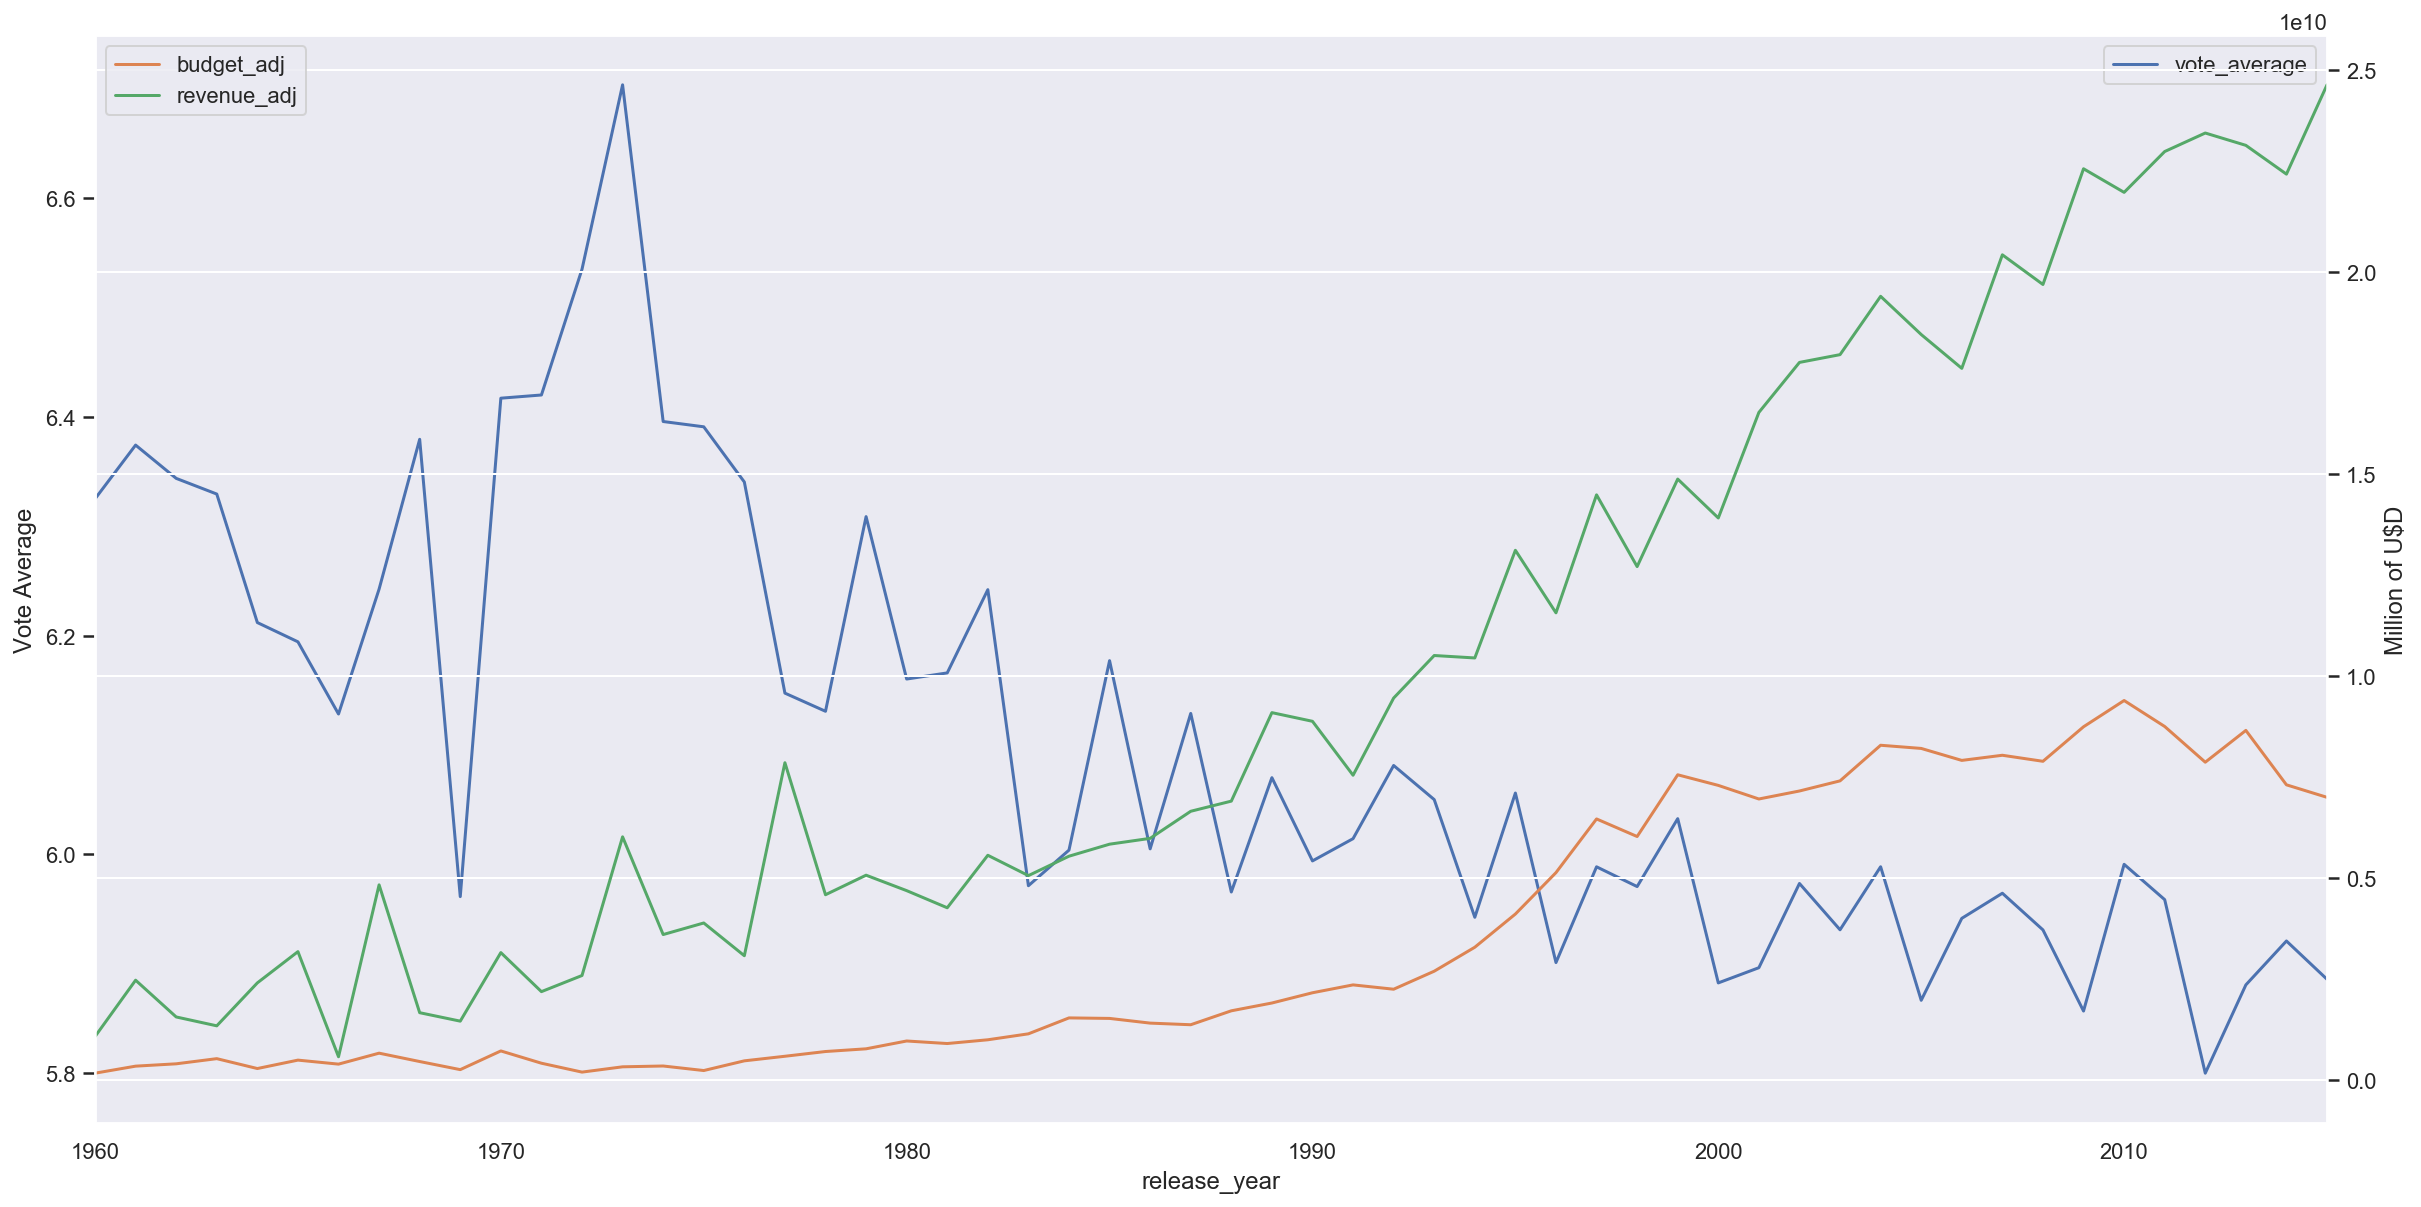

In [8]:
ax = main_df.groupby('release_year').vote_average.mean().plot(kind='line', figsize=(20,10))
ax3 = main_df.groupby('release_year').budget_adj.sum().plot(kind='line', figsize=(20,10), secondary_y=True)
ax2 = main_df.groupby('release_year').revenue_adj.sum().plot(kind='line', figsize=(20,10), ax=ax, secondary_y=True)

ax.legend()
ax2.legend()
ax3.legend()
ax.set_ylabel('Vote Average')
ax2.set_ylabel('Million of U$D')
plt.show();

On this graph we plotted 3 elements interesting to analyze over time. On the left axis we have the vote average score of all movies for a whole year, and on the right axis we have revenue and budget. We can clearly see that vote average score has been decreasing over time, from a max of almost 6.8 to a low of 5.8, we can't tell the reasons of why this happens, but apparently old movies are better rated than new ones on average.
On the other hand, while average score decreases, revenue increased a lot over time, which shows how the movie industry became more and more a business above all things. It is also interesting to note that budget didn't decrease as much as revenue, which is a good thing as it means better margins for the movie industry.

<a id='conclusions'></a>
## Conclusions

 - So regarding the first question on what influences revenue, we see that there is a weak correlation between budget and revenue, and there is some correlation with vote count and popularity. Although we must warn that correlation does not imply causation, and we are only describing the data.

 - Regarding the second question, we were able to observe how the industry changed over time. First with the decreasing average score, and the second with the increasing revenue and budget. Concluding that apparently movies were better before, but movie industry wasn't as developed as it is today to generate more revenue.


In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0